# EvalML

GitHub: https://github.com/alteryx/evalml

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [126]:
train = pd.read_csv("../data/human-activity-recognition/train.csv")
train['Activity'] = pd.DataFrame(np.where(train['Activity']=='WALKING_DOWNSTAIRS', 1, 0))
# train['date'] = list(train.index)
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,0


In [92]:
train['Activity'].unique()

array([0, 1])

In [127]:
# Select the first 562 features. Ignore the 'subject' column
X = train.iloc[:,:-2]
X['date'] = pd.date_range(start='1/1/2022', periods=len(X), freq='S')
# Select the 'activity' column as an outcome
y = train.iloc[:,-1]

# Select the first 562 features. Ignore the 'subject' column
# X = train[train.columns.difference(['subject', 'Activity'])]
# Select the 'activity' column as an outcome
# y = train['Activity']

In [129]:
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",date
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,2022-01-01 00:00:00
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,2022-01-01 00:00:01
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,2022-01-01 00:00:02
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,2022-01-01 00:00:03
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,2022-01-01 00:00:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,2022-01-01 02:02:27
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,2022-01-01 02:02:28
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,2022-01-01 02:02:29
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,2022-01-01 02:02:30


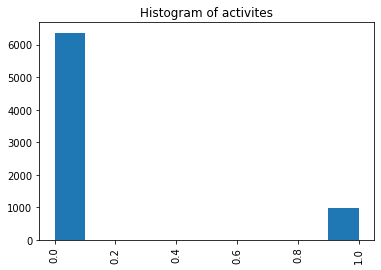

In [130]:
plt.hist(train['Activity'])
plt.title('Histogram of activites')
plt.xticks(rotation = 90) 
plt.show()

In [61]:
# WALKING_DOWNSTAIRS
y = pd.DataFrame(np.where(y=='WALKING_DOWNSTAIRS', 1, 0))
y.head(3)

,0
0,0
1,0
2,0


In [131]:
X.ww.init()

In [132]:
from evalml.demos import load_weather
from evalml.automl import AutoMLSearch
from evalml.utils.gen_utils import validate_holdout_datasets
from evalml.problem_types.problem_types import ProblemTypes
import woodwork as ww

In [138]:
problem_config = {'gap': 0, 
                  'max_delay': 7, 
                  'forecast_horizon': 7, 
                  'time_index': 'date'
                 }

automl = AutoMLSearch(X, y, 
                      problem_type=ProblemTypes.TIME_SERIES_BINARY,
                      max_batches=1,
                      problem_configuration=problem_config,
                      allowed_model_families=['xgboost', 'random_forest', 'linear_model', 'extra_trees','decision_tree']
                      )

Time series support in evalml is still in beta, which means we are still actively building its core features. Please be mindful of that when running search().


In [139]:
automl.search()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Time Series Baseline Binary Pipeline may not perform as estimated on unseen data.
/home/us3r/projects/automl-time-series/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Logistic Regression Classifier w/ Label Encoder + Imputer + Time Series Featurizer + DateTime Featurizer + Drop NaN Rows Transformer + Oversampler + Standard Scaler may not perform as estimated on unseen data.
/home/us3r/pr

In [160]:
test = pd.read_csv("../data/human-activity-recognition/test.csv")
test['Activity'] = pd.DataFrame(np.where(test['Activity']=='WALKING_DOWNSTAIRS', 1, 0))
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,0
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,0
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,0
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,0
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,0


In [162]:
# Select the first 562 features. Ignore the 'subject' column
X_test = test.iloc[:,:-2]
X_test['date'] = pd.date_range(start='1/1/2022 02:02:32', periods=len(X_test), freq='S')
# Select the 'activity' column as an outcome
y_test = test.iloc[:,-1]

In [ ]:
pl = automl.best_pipeline

best_scores = pl.score(X=X_test, 
                       y=y_test, 
                       objectives=['F1', 'Recall'], 
                       X_train=X, 
                       y_train=y)

TODO: try to debug the code and find out the reason of the following exception:


```
PipelineScoreError: F1 encountered AttributeError with message ('NoneType' object has no attribute 'iloc'):
```